In [1]:
# IMPORT Everything here
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import ast
import re
#from Iconfig import api_Key
#from Iconfig import api_READ_token
import json
from collections import Counter 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
movie_metadata_path = "Resources/movies_metadata.csv"


movie_metadata = pd.read_csv(movie_metadata_path, low_memory = False)


movie_metadata.head(20)

len(movie_metadata)

45466

In [4]:
# Cleaning Data
movie_metadata_df =  movie_metadata[["title", "imdb_id", "genres", "release_date", "budget", "revenue", "runtime", "vote_average", "vote_count", "production_companies","popularity"]]

# Custom function to extract company names from JSON strings
def extract_and_join_company_names(json_str):
    if pd.notnull(json_str):
        names = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(names)  # Join the company names into a single string separated by ', '
    else:
        return "Unknown"
    
# Apply the custom function to the 'production_companies' column
movie_metadata_df.loc[:, "production_companies"] = movie_metadata_df["production_companies"].apply(lambda x: extract_and_join_company_names(x))


# Custom function to extract and join genre names from JSON strings
def extract_and_join_genre_names(json_str):
    if pd.notnull(json_str):
        genres = re.findall(r"'name': '([^']*)'", json_str)
        return ', '.join(genres)  # Join the genre names into a single string separated by ', '
    else:
        return "Unknown"  # Return "Unknown" if the JSON string is empty or NaN

# Use .apply with a lambda function and .loc for the assignment
movie_metadata_df.loc[:, "genres"] = movie_metadata_df["genres"].apply(lambda x: extract_and_join_genre_names(x))


movie_metadata_df.head(10)




,title,imdb_id,genres,release_date,budget,revenue,runtime,vote_average,vote_count,production_companies,popularity
0,Toy Story,tt0114709,"Animation, Comedy, Family",1995-10-30,30000000,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,21.946943
1,Jumanji,tt0113497,"Adventure, Fantasy, Family",1995-12-15,65000000,262797249.0,104.0,6.9,2413.0,"TriStar Pictures, Teitler Film, Interscope Com...",17.015539
2,Grumpier Old Men,tt0113228,"Romance, Comedy",1995-12-22,0,0.0,101.0,6.5,92.0,"Warner Bros., Lancaster Gate",11.7129
3,Waiting to Exhale,tt0114885,"Comedy, Drama, Romance",1995-12-22,16000000,81452156.0,127.0,6.1,34.0,Twentieth Century Fox Film Corporation,3.859495
4,Father of the Bride Part II,tt0113041,Comedy,1995-02-10,0,76578911.0,106.0,5.7,173.0,"Sandollar Productions, Touchstone Pictures",8.387519
5,Heat,tt0113277,"Action, Crime, Drama, Thriller",1995-12-15,60000000,187436818.0,170.0,7.7,1886.0,"Regency Enterprises, Forward Pass, Warner Bros.",17.924927
6,Sabrina,tt0114319,"Comedy, Romance",1995-12-15,58000000,0.0,127.0,6.2,141.0,"Paramount Pictures, Scott Rudin Productions, M...",6.677277
7,Tom and Huck,tt0112302,"Action, Adventure, Drama, Family",1995-12-22,0,0.0,97.0,5.4,45.0,Walt Disney Pictures,2.561161
8,Sudden Death,tt0114576,"Action, Adventure, Thriller",1995-12-22,35000000,64350171.0,106.0,5.5,174.0,"Universal Pictures, Imperial Entertainment, Si...",5.23158
9,GoldenEye,tt0113189,"Adventure, Action, Thriller",1995-11-16,58000000,352194034.0,130.0,6.6,1194.0,"United Artists, Eon Productions",14.686036


In [5]:
len(movie_metadata_df)

45466

In [6]:
# Number of movies produced by each production company

In [7]:

len(movie_metadata_df)

45466

In [8]:
# Create a new DataFrame with selected columns
selected_columns = ['title', 'production_companies', 'popularity']
new_dataset = movie_metadata_df[selected_columns].copy()

# Display the new dataset
(new_dataset.head())


,title,production_companies,popularity
0,Toy Story,Pixar Animation Studios,21.946943
1,Jumanji,"TriStar Pictures, Teitler Film, Interscope Com...",17.015539
2,Grumpier Old Men,"Warner Bros., Lancaster Gate",11.7129
3,Waiting to Exhale,Twentieth Century Fox Film Corporation,3.859495
4,Father of the Bride Part II,"Sandollar Productions, Touchstone Pictures",8.387519


In [9]:
# Convert 'production_companies' column to a list
new_dataset['production_companies'] = new_dataset['production_companies'].str.split(', ')


new_dataset.head()

,title,production_companies,popularity
0,Toy Story,[Pixar Animation Studios],21.946943
1,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co...",17.015539
2,Grumpier Old Men,"[Warner Bros., Lancaster Gate]",11.7129
3,Waiting to Exhale,[Twentieth Century Fox Film Corporation],3.859495
4,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]",8.387519


In [10]:
# Create a new DataFrame to store the flattened production companies
df_flattened_companies = new_dataset.explode('production_companies')

# Drop rows where the 'production_companies' column is empty
df_flattened_companies = df_flattened_companies[df_flattened_companies['production_companies'] != '']

# Group by 'production_companies' and count the number of movies for each company
df_production_companies_counts = df_flattened_companies.groupby('production_companies')['title'].count().reset_index()

# Rename the columns to 'Production Company' and 'Number of Movies'
df_production_companies_counts.columns = ['Production Company', 'Number of Movies']

# Sort the DataFrame by 'Number of Movies' column in descending order (highest to lowest)
df_production_companies_counts = df_production_companies_counts.sort_values(by='Number of Movies', ascending=False)

# Reset the index to maintain a continuous index after sorting
df_production_companies_counts.reset_index(drop=True, inplace=True)

(df_production_companies_counts.head(10))

,Production Company,Number of Movies
0,Warner Bros.,1250
1,Metro-Goldwyn-Mayer (MGM),1076
2,Paramount Pictures,1003
3,Twentieth Century Fox Film Corporation,836
4,Universal Pictures,830
5,Columbia Pictures Corporation,450
6,Canal+,438
7,Columbia Pictures,431
8,RKO Radio Pictures,301
9,United Artists,279


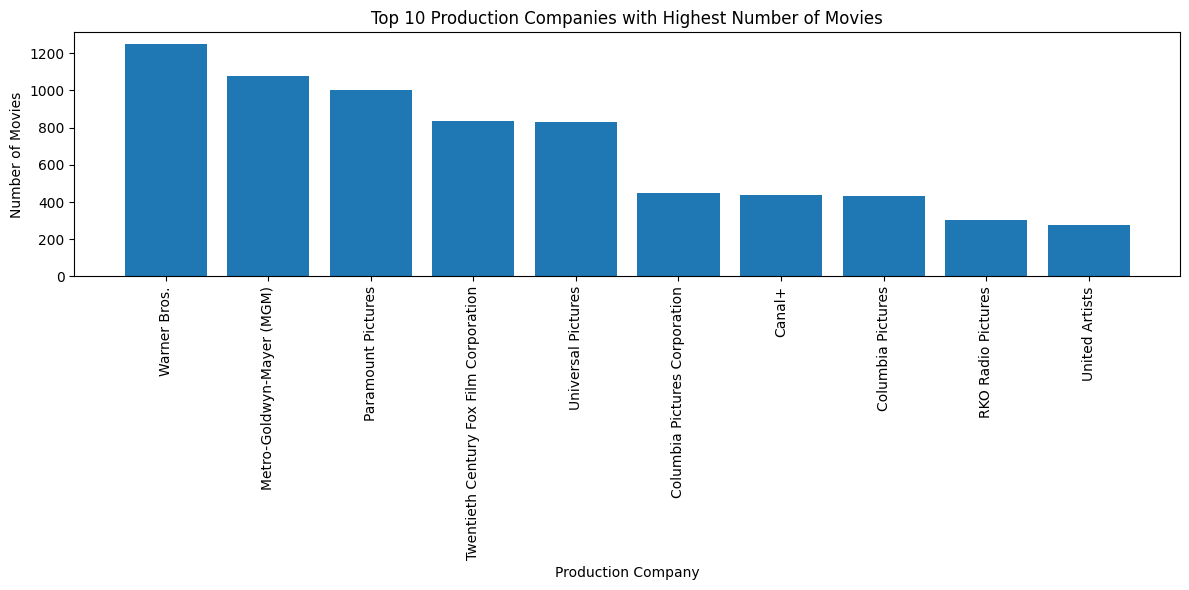

In [11]:
# Visualization
top_10_companies = df_production_companies_counts.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['Production Company'], top_10_companies['Number of Movies'])
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.title('Top 10 Production Companies with Highest Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Sum of popularity scores of all the movies produced by each company

In [13]:
# Clean the 'popularity' column and convert it to numeric using .loc
movie_metadata_df.loc[:, 'popularity'] = pd.to_numeric(movie_metadata_df['popularity'], errors='coerce')

# Drop rows with no production company
movie_metadata_df = movie_metadata_df[movie_metadata_df['production_companies'] != '']

# Split the lists in the 'production_companies' column into separate rows
movie_metadata_df = movie_metadata_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the sum of popularity scores
company_popularity_sum = movie_metadata_df.groupby('production_companies')['popularity'].sum().reset_index(name='popularity_sum')

# Sort the results in descending order
company_popularity_sum = company_popularity_sum.sort_values(by='popularity_sum', ascending=False)

(company_popularity_sum.head(11))

,production_companies,popularity_sum
14403,Paramount Pictures,1808.607839
12257,Metro-Goldwyn-Mayer (MGM),1365.35772
21538,Warner Bros.,1329.709752
20472,Universal Pictures,1319.880924
19751,Twentieth Century Fox Film Corporation,1156.516961
4149,Columbia Pictures,639.474065
20622,"Universal Pictures, Illumination Entertainment",621.800831
21378,Walt Disney Pictures,596.749623
13210,New Line Cinema,506.828373
4150,Columbia Pictures Corporation,430.632202


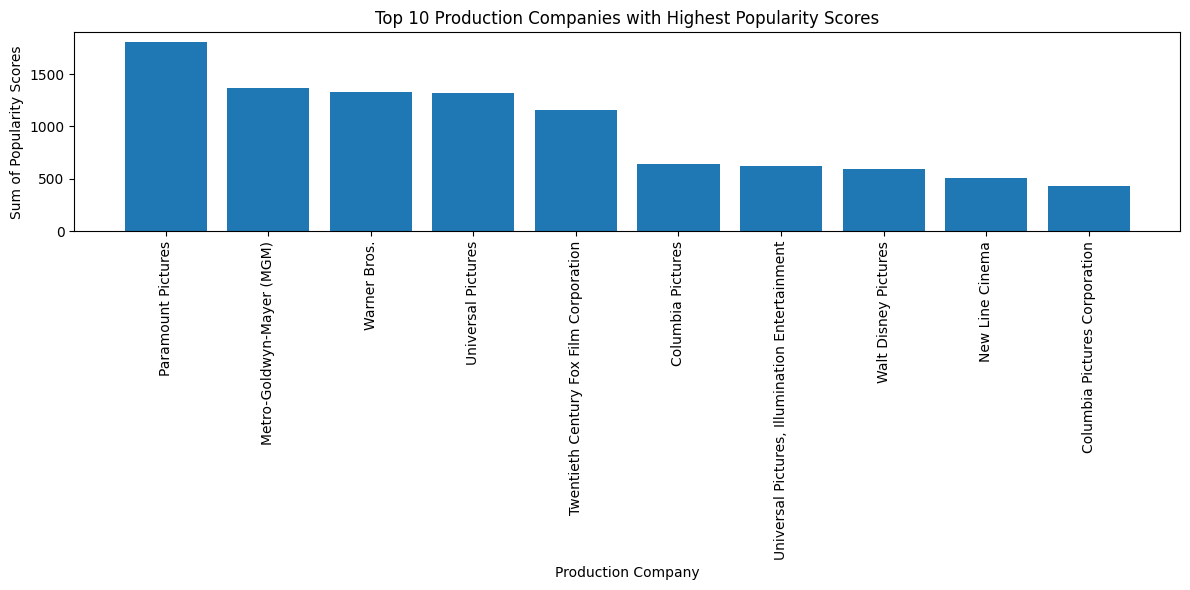

In [14]:
# Visualization
top_10_companies = company_popularity_sum.head(10)

# Plot 
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['production_companies'], top_10_companies['popularity_sum'])
plt.xlabel('Production Company')
plt.ylabel('Sum of Popularity Scores')
plt.title('Top 10 Production Companies with Highest Popularity Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Drop rows with no production company
movie_metadata_df = movie_metadata_df[movie_metadata_df['production_companies'] != '']

# Split the lists in the 'production_companies' column into separate rows
movie_metadata_df = movie_metadata_df.explode('production_companies')

# Group the DataFrame by production companies and calculate the mean of popularity scores
company_popularity_mean = movie_metadata_df.groupby('production_companies')['popularity'].mean().reset_index(name='popularity_mean')

# Sort the results in descending order
company_popularity_mean = company_popularity_mean.sort_values(by='popularity_mean', ascending=False)


print(company_popularity_mean.head(10))


                                    production_companies popularity_mean
5783   Dune Entertainment, Atlas Entertainment, Warne...      294.337037
2296   Big Talk Productions, TriStar Pictures, Media ...      228.032744
19941  Twentieth Century Fox Film Corporation, Marvel...      187.860492
9520   Ingenious Film Partners, Twentieth Century Fox...      185.070892
18283  Summit Entertainment, Warner Bros., 87Eleven, ...      183.870374
19977  Twentieth Century Fox Film Corporation, Regenc...      154.801009
21434             Walt Disney Pictures, Mandeville Films      148.406669
3648                               Chernin Entertainment      146.161786
18074  Studio Babelsberg, Marvel Studios, Walt Disney...      145.882135
12518          Miramax Films, A Band Apart, Jersey Films      140.950236


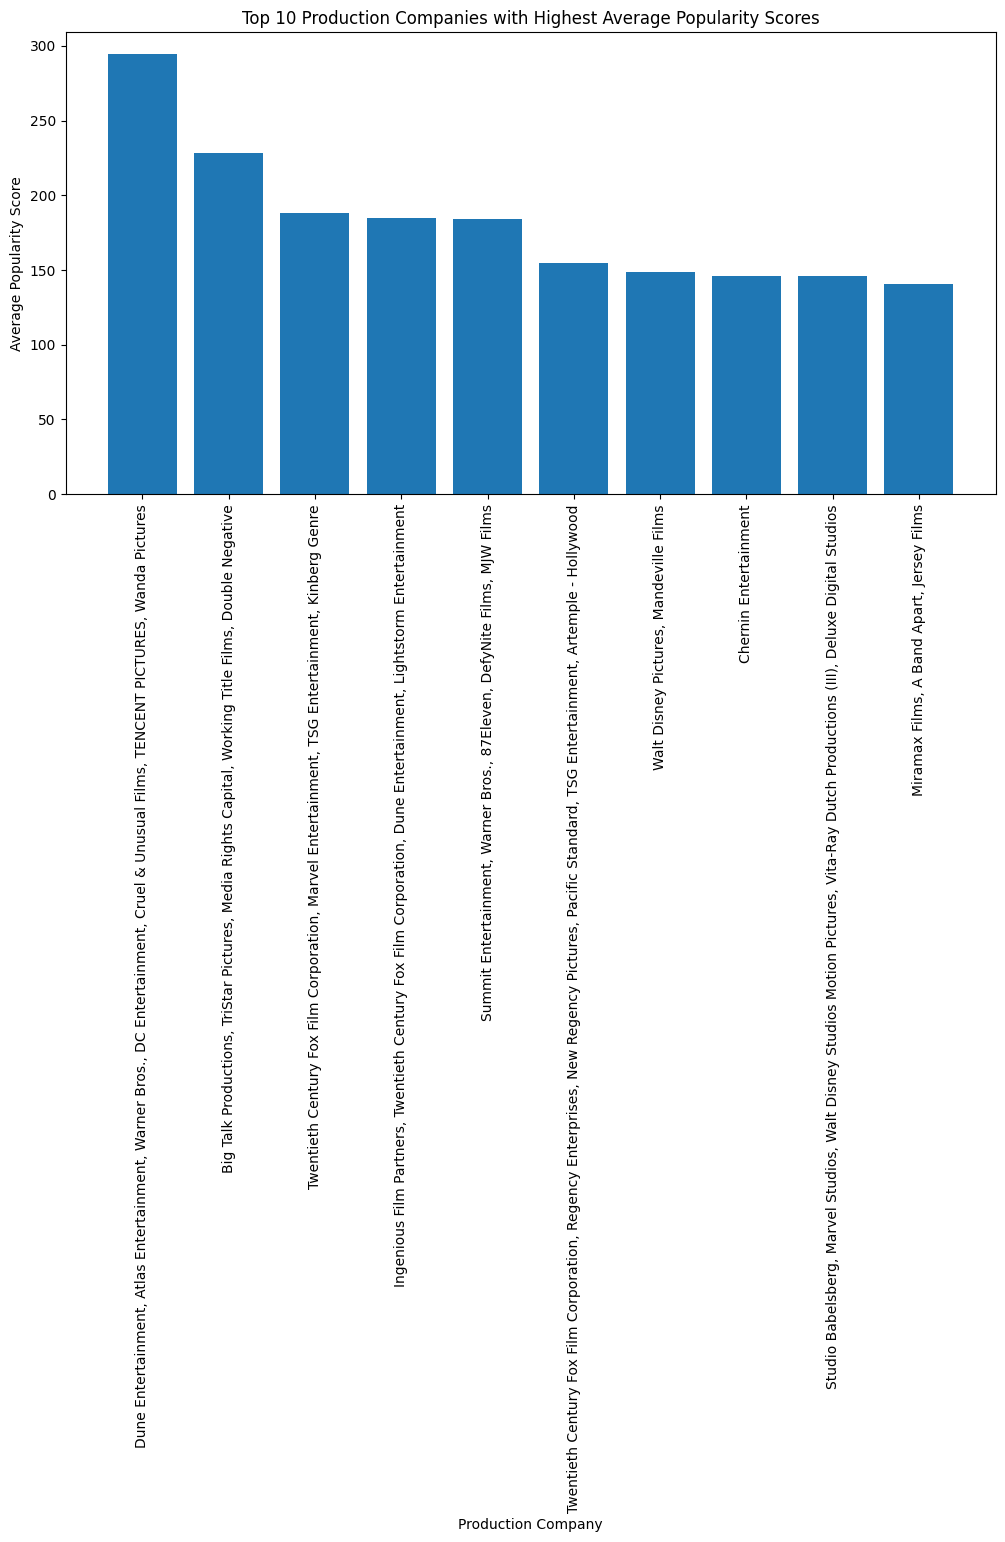

In [16]:
# Top 10 production companies with the highest popularity scores
top_10_companies = company_popularity_mean.head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_companies['production_companies'], top_10_companies['popularity_mean'])
plt.xlabel('Production Company')
plt.ylabel('Average Popularity Score')
plt.title('Top 10 Production Companies with Highest Average Popularity Scores')
plt.xticks(rotation=90)
plt.show()